## Self-Study Colab Activity 8.3: Using Validation to Select the Best Combination of Parameters

**Expected Time: 60 Minutes**


This activity focuses on using a train/test split to select the best hyperparameters for a linear regression model complexity.  You will become familiar with scikit-learn's `train_test_split` function to generate a train/test split and use the results to evaluate the appropriate model complexity.  The datasets used are synthetic so as to allow a comparison with the learned best complexity to that which generated the data.  

## Index:

- [Problem 1](#Problem-1)
- [Problem 2](#Problem-2)
- [Problem 3](#Problem-3)
- [Problem 4](#Problem-4)


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import pandas as pd

### Three Synthetic Datasets

Below, polynomial functions of different degrees were created, and noise was added to generate three basic synthetic datasets.  The relationships are then plotted. They are of varying true complexity -- cubic, quadratic, and quintic (polynomials of degree 5).  Your goal is to use cross-validation to determine the appropriate model and examine its mean squared error on a set of validation data. 

In [2]:
df = pd.read_csv('data/synthetic_8.6.csv')

In [3]:
df.head()

,x,y1,y2,y3
0,-2.000000,-0.522368,5.698300,3.880352
1,-1.929293,-0.711336,-0.257942,8.643553
2,-1.858586,-4.759917,12.775233,6.116844
3,-1.787879,-10.255472,22.140157,12.493956
4,-1.717172,-3.503845,27.656110,10.335220


**Plots of the Synthetic Datasets**

<img src = 'images/quad.png'/><img src = 'images/quintic.png'/><img src = 'images/cubic.png'/>

[Back to top](#Index:) 

### Problem 1

#### Creating the Train and Test sets


The scikit-learn library has a built-in function called `train_test_split` that accepts one or many arrays and returns a randomized split of the data.  Use the `train_test_split` function to split `x` and `y1` into train and test sets.  Set `random_state = 32` and create a test set using 30% of the data.  Assign your results as arrays to `X_train, X_test, y1_train, y1_test` below.  

- In anticipation of using `LinearRegression` estimator, make sure your `X_train` and `X_test` are of shapes (70, 1) and (30, 1) respectively.

In [6]:


X_train, X_test, y1_train, y1_test = '', '', '', ''
# Problem 1
X = df['x'].values.reshape(-1, 1)  # Reshape to (n_samples, 1) for sklearn
y1 = df['y1'].values

X_train, X_test, y1_train, y1_test = train_test_split(X, y1,
                                                      test_size=0.3,
                                                      random_state=32)

# Answer check
#print(df['x'].shape, X_train.shape, X_test.shape)

# Answer check
print(df['x'].shape, X_train.shape, X_test.shape)
print("First 5 elements of X_train:\n", X_train[:5])  # Using array slicing instead of head()

(100,) (70, 1) (30, 1)
First 5 elements of X_train:
 [[ 4.43434343]
 [-0.51515152]
 [ 2.31313131]
 [-2.        ]
 [ 0.19191919]]


[Back to top](#Index:) 

### Problem 2


Use the `train_test_split` function to create similar splits of `y2` and `y3`.  Use the `random_state = 32` and create a test set using 30% of the data.   Assign your results to `y2_train`, `y2_test`, `y3_train`, and `y3_test` below.  

In [12]:
# Problem 2
y2 = df['y2'].values
y3 = df['y3'].values

# Use the same X to maintain consistent splits
_, _, y2_train, y2_test = train_test_split(X, y2,
                                          test_size=0.3,
                                          random_state=32)
_, _, y3_train, y3_test = train_test_split(X, y3,
                                          test_size=0.3,
                                          random_state=32)

# Answer check
print(df['y2'].shape, y2_train.shape, y2_test.shape)
print("First 5 elements of y2_train:", y2_train[:5])

(100,) (70,) (30,)
First 5 elements of y2_train: [-173.74413623  -28.02155209  -15.80673173    5.69830016  -21.69655217]


[Back to top](#Index:) 

### Problem 3


Use a `for` loop to loop over the values from one to 20. For each iteration `i`:

- Use `Pipeline` to create a pipeline object. Inside the pipeline object define a a tuple where the first element is a string identifier `pfeat` and the second element is an instance of `PolynomialFeatures` of degree `i` with `include_bias = False`. Inside the pipeline define another tuple where the first element is a string identifier `linreg`, and the second element is an instance of `LinearRegression`. Assign the pipeline object to the variable `pipe`.
- Use the `fit` function on `pipe` to train your model on `X_train` and `y1_train`. Assign the result to `train_preds`.
- Use the `predict` function on `pipe` to compute your prediction on `X_test`. Assign the result to `test_preds`.
- Use the `mean_squared_error` function to calculate the MSE between `y1_train` and `train_preds`. Append your result to the `train_mses` list.
- Use the `mean_squared_error` function to calculate the MSE between `y1_test` and `test_preds`. Append your result to the `test_mses` list.

In [14]:
train_mses = []
test_mses = []

for i in range(1, 21):
    # Create pipeline
    pipe = Pipeline([
        ('pfeat', PolynomialFeatures(degree=i, include_bias=False)),
        ('linreg', LinearRegression())
    ])

    # Fit pipeline
    pipe.fit(X_train, y1_train)

    # Get predictions
    train_preds = pipe.predict(X_train)
    test_preds = pipe.predict(X_test)

    # Calculate MSEs
    train_mses.append(mean_squared_error(y1_train, train_preds))
    test_mses.append(mean_squared_error(y1_test, test_preds))

best_model_complexity = test_mses.index(min(test_mses)) + 1

# Answer check
print(f'The Complexity that minimized Test Error was: {best_model_complexity}')

The Complexity that minimized Test Error was: 2


Uncomment the code below to visualize the results of your model fitting.  Note that the data in `y1` were created from a quadratic model originally.

The Complexity that minimized Test Error was: 2


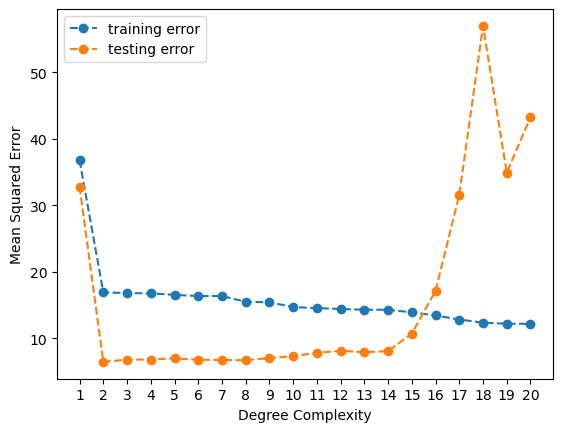

In [15]:
print(f'The Complexity that minimized Test Error was: {test_mses.index(min(test_mses)) + 1}')
plt.plot(range(1, 21), train_mses, '--o', label = 'training error')
plt.plot(range(1, 21), test_mses, '--o', label = 'testing error')
plt.xticks(range(1, 21), range(1, 21))
plt.xlabel('Degree Complexity')
plt.ylabel('Mean Squared Error')
plt.legend();

[Back to top](#Index:) 

### Problem 4

#### Write a function to determine best model complexity



Complete the definition of the `simple_cross_validation` function according to the following instructions:


Use a `for` loop to loop over the values from one to 20. For each iteration `i`:

- Use `Pipeline` to create a pipeline object. Inside the pipeline object define a a tuple where the first element is a string identifier `pfeat` and the second element is an instance of `PolynomialFeatures` of degree `i` with `include_bias = False`. Inside the pipeline define another tuple where the first element is a string identifier `linreg`, and the second element is an instance of `LinearRegression`. Assign the pipeline object to the variable `pipe`.
- Use the `fit` function on `pipe` to train your model on `X_train` and `y_train`. 
- Use the `predict` function on `pipe` to compute your prediction on `X_test`. Assign the result to `test_preds`.
- Use the `mean_squared_error` function to calculate the MSE between `y_test` and `test_preds`. Assign your result to `test_mse`.
- Use an `if` statement to check that `test_mse` is less than `best_mse`:
    - If the condition is satisifed assign `test_mse` to `best_mse` and `pipe` to `best_pipe`.
- Your function should return `best_pipe`.

In [16]:
def simple_cross_validation(X_train, y_train, X_test, y_test):
    best_pipe = None
    best_mse = np.inf

    for i in range(1, 21):
        # Create pipeline
        pipe = Pipeline([
            ('pfeat', PolynomialFeatures(degree=i, include_bias=False)),
            ('linreg', LinearRegression())
        ])

        # Fit pipeline
        pipe.fit(X_train, y_train)

        # Get test predictions and MSE
        test_preds = pipe.predict(X_test)
        test_mse = mean_squared_error(y_test, test_preds)

        # Update best model if current is better
        if test_mse < best_mse:
            best_mse = test_mse
            best_pipe = pipe

    return best_pipe


best_model = simple_cross_validation(X_train, y2_train, X_test, y2_test)
best_model.get_params() #should be degree = 10

{'memory': None,
 'steps': [('pfeat', PolynomialFeatures(degree=10, include_bias=False)),
  ('linreg', LinearRegression())],
 'verbose': False,
 'pfeat': PolynomialFeatures(degree=10, include_bias=False),
 'linreg': LinearRegression(),
 'pfeat__degree': 10,
 'pfeat__include_bias': False,
 'pfeat__interaction_only': False,
 'pfeat__order': 'C',
 'linreg__copy_X': True,
 'linreg__fit_intercept': True,
 'linreg__n_jobs': None,
 'linreg__normalize': False}

## Summary of Exercises

This notebook explored model complexity selection using train/test validation with synthetic polynomial datasets. The exercises covered:

1. **Data Splitting**: Used `train_test_split` to create training (70%) and test (30%) sets for three synthetic datasets with different polynomial relationships.

2. **Model Complexity Analysis**: Implemented polynomial regression with degrees 1-20 using scikit-learn's Pipeline, combining `PolynomialFeatures` and `LinearRegression`.

3. **Error Evaluation**: Calculated and compared training and testing Mean Squared Error (MSE) across different polynomial degrees.

4. **Model Selection**: Created a `simple_cross_validation` function to automatically select the best polynomial degree based on test set performance.

## Key Takeaways

1. **Bias-Variance Tradeoff**: The plots demonstrate the classic tradeoff between model complexity and generalization:
   - Low-degree polynomials underfit (high bias)
   - High-degree polynomials overfit (high variance)
   - Optimal complexity found where test error minimizes

2. **Cross-Validation Importance**: Using a separate test set helps identify the true optimal model complexity, preventing overfitting.

3. **Pipeline Benefits**: Scikit-learn's Pipeline simplifies the process of combining feature engineering (`PolynomialFeatures`) with model fitting (`LinearRegression`).

4. **True vs. Learned Complexity**: The exercise allows comparison between the true polynomial degree that generated the data and the degree selected through validation, demonstrating the effectiveness of the validation approach.